<div style="
    background-color: #0b2343; 
    color: white; 
    padding: 25px; 
    font-family: Arial, sans-serif;
">
    <h2 style="margin: 0; font-size: 24px; font-weight: normal;">
        Data Analytics & Machine Learning in Finance
    </h2>
    <h1 style="margin: 5px 0 0 0; font-size: 48px; font-weight: bold;">
        Linear and Logistic Regression
    </h1>
    <p style="margin: 8px 0 0 0; font-size: 18px;">
        Pedro Ramón Ventura Gómez
    </p>
    <p style="margin: 2px 0 0 0; font-size: 16px;">
        pventura@march-am.com
    </p>
</div>


# Linear Regression

Linear Regression is one of the most fundamental and widely used algorithms in machine learning and statistics. It models the relationship between **input variables** ($X = \{x_1, x_2, \ldots, x_n\}, \quad x_i \neq x_j \;\; \text{if } i \neq j$) and a **continuous target variable** ($y$) by fitting a straight line (or hyperplane in multiple dimensions).

**Linear Regression** is a **supervised Machine Learning algorithm** used for regression tasks:

- **Supervised:** Requires a labeled dataset (features $X$ and target $y$) to learn the relationship.
- **Regression:** Predicts a continuous outcome instead of discrete classes.
- **Parametric:** Assumes a linear functional form with a fixed set of parameters (coefficients $\alpha \text{ and } \beta_1, \beta_2,..., \beta_n$).

The model predicts $y$ as a linear combination of the input features:

$$
y = f(X) = \alpha + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

Where:

- $y$: Dependent variable or objective variable or output to predict
- $x_i$: Independent variable or input feature
- $\alpha$: intercept (bias term)
- $\beta_i$: coefficient for input feature $x_i$
- $n$: number of features

## Example

In [1]:
import numpy as np

# Random seed.
rng = np.random.default_rng(42)
# Number of samples.
n_samples = 100
# Input/independent variable.
x = np.linspace(-5, 5, n_samples)
# Output/dependent variable.
y = 2 * x + 5
# Gaussian noise (normal distribution).
noise = rng.normal(loc=0.0, scale=2.0, size=n_samples)
# Final output.
y = y + noise

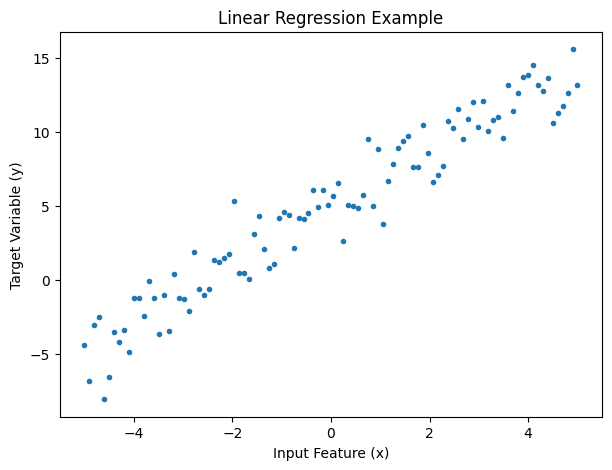

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(x, y, marker=".")
plt.title("Linear Regression Example")
plt.xlabel("Input Feature (x)")
plt.ylabel("Target Variable (y)")
plt.show()

## How it works


The goal is to find the parameters $\alpha, \beta_1, \dots, \beta_n$ that minimize the difference between the predicted values $\hat{y}$ and the actual values $y$.

This is usually done by minimizing the **Mean Squared Error (MSE):**

$$
MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2
$$



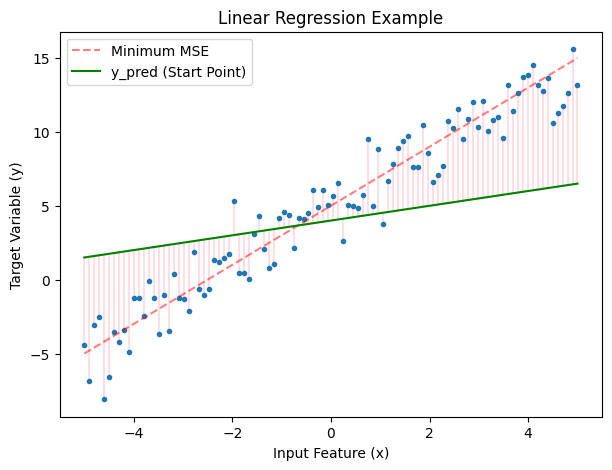

In [3]:
plt.figure(figsize=(7, 5))
plt.scatter(x, y, marker=".")
plt.plot(x, 2 * x + 5, color="red", linestyle="--", alpha=0.5, label="Minimum MSE")  # Goal, minimum MSE.
plt.plot(x, 0.5 * x + 4, color="green", label="y_pred (Start Point)")  # Start point.

# Plot error between y and y_pred.
for i in range(n_samples):
    plt.plot([x[i], x[i]], [y[i], 0.5 * x[i] + 4], color="pink", alpha=0.5, zorder=0)

plt.title("Linear Regression Example")
plt.xlabel("Input Feature (x)")
plt.ylabel("Target Variable (y)")
plt.legend()
plt.show()


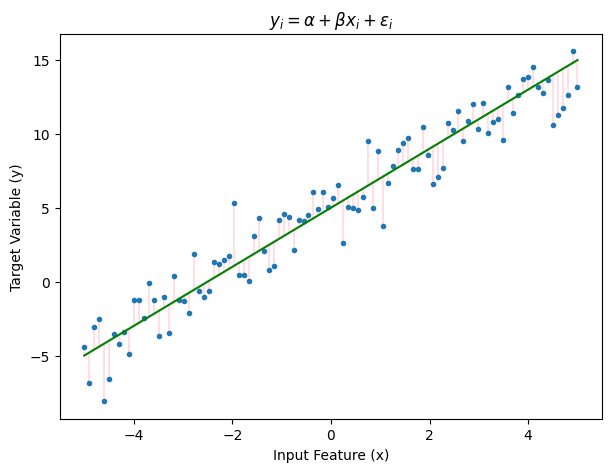

In [4]:
plt.figure(figsize=(7, 5))
plt.scatter(x, y, marker=".")
plt.plot(x, 2 * x + 5, color="green")

for i in range(n_samples):
    plt.plot([x[i], x[i]], [y[i], 2 * x[i] + 5], color="pink", alpha=0.5, zorder=0)

plt.title("$y_i = \\alpha + \\beta x_i + \\varepsilon_i$")
plt.xlabel("Input Feature (x)")
plt.ylabel("Target Variable (y)")
plt.show()


## How do we find the optimals $\alpha$ and $\beta$?

We assume the relationship between input $x_i$ and target $y_i$ can be expressed as:

$$
y_i = \alpha + \beta x_i + \varepsilon_i
$$

where:

* $\alpha$ = intercept
* $\beta$ = slope
* $\varepsilon_i$ = error term

The fitted values are:

$$
\hat{y}_i = \alpha + \beta x_i
$$

All the above expressed in a single graph:

<img src="./images/algorithms/linear_regression-intro_0.png" style="display:block; margin:auto; width:50%">

OLS finds the line $\hat{y} = \alpha + \beta x$ that minimizes squared residuals.
The formulas are:

$$
\hat{\beta} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{\text{Cov}(x,y)}{\text{Var}(x)} 
$$

$$
\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}
$$

This guarantees that:

1. The fitted line always passes through the point $(\bar{x}, \bar{y})$.
2. The residuals sum to zero.


### Demonstration step by step (optional)


**Ordinary Least Squares (OLS) Principle**

OLS chooses $\alpha$ and $\beta$ that minimize the **sum of squared errors** (residuals):

$$
\hat{y}_i = \alpha + \beta x_i
$$

$$
S(\alpha, \beta) = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n (y_i - \alpha - \beta x_i)^2
$$

---

**Step 1: Derivatives with respect to parameters**

To minimize $S(\alpha, \beta)$, we set the partial derivatives equal to zero:

$$
\frac{\partial S}{\partial \alpha} = -2 \sum_{i=1}^n (y_i - \alpha - \beta x_i) = 0
$$

$$
\frac{\partial S}{\partial \beta} = -2 \sum_{i=1}^n x_i (y_i - \alpha - \beta x_i) = 0
$$

These give us the **normal equations**.

---

**Step 2: Normal Equations**

From minimizing the sum of squared errors, we obtained two equations:

1.

$$
\sum_{i=1}^n y_i = n\alpha + \beta \sum_{i=1}^n x_i
$$

2.

$$
\sum_{i=1}^n x_i y_i = \alpha \sum_{i=1}^n x_i + \beta \sum_{i=1}^n x_i^2
$$

This is a linear system in two unknowns: $\alpha$ and $\beta$.

---

**Step 3a: Express $\alpha$ in terms of $\beta$**

From equation (1):

$$
n\alpha = \sum y_i - \beta \sum x_i
$$

$$
\alpha = \frac{\sum y_i}{n} - \beta \frac{\sum x_i}{n}
$$

Notice that:

$$
\frac{\sum y_i}{n} = \bar{y}, \quad \frac{\sum x_i}{n} = \bar{x}
$$

So:

$$
\alpha = \bar{y} - \beta \bar{x}
$$

---

**Step 3b: Substitute into the second equation**

Equation (2):

$$
\sum x_i y_i = \alpha \sum x_i + \beta \sum x_i^2
$$

Substitute $\alpha = \bar{y} - \beta \bar{x}$:

$$
\sum x_i y_i = (\bar{y} - \beta \bar{x})\sum x_i + \beta \sum x_i^2
$$

Expand:

$$
\sum x_i y_i = \bar{y} \sum x_i - \beta \bar{x} \sum x_i + \beta \sum x_i^2
$$

---

**Step 3c: Simplify using means**

Note that $\sum x_i = n \bar{x}$. So:

$$
\sum x_i y_i = \bar{y}(n\bar{x}) - \beta \bar{x}(n\bar{x}) + \beta \sum x_i^2
$$

$$
\sum x_i y_i = n\bar{x}\bar{y} - n\beta \bar{x}^2 + \beta \sum x_i^2
$$

---

**Step 3d: Solve for $\beta$**

Rearrange terms:

$$
\sum x_i y_i - n\bar{x}\bar{y} = \beta \left(\sum x_i^2 - n\bar{x}^2\right)
$$

Divide both sides:

$$
\hat{\beta} = \frac{\sum x_i y_i - n\bar{x}\bar{y}}{\sum x_i^2 - n\bar{x}^2}
$$

---

**Step 3e: Recognize covariance and variance**

The numerator:

$$
\sum x_i y_i - n\bar{x}\bar{y} = \sum (x_i - \bar{x})(y_i - \bar{y})
$$

The denominator:

$$
\sum x_i^2 - n\bar{x}^2 = \sum (x_i - \bar{x})^2
$$

So:

$$
\hat{\beta} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

This is exactly:

$$
\hat{\beta} = \frac{\text{Cov}(x,y)}{\text{Var}(x)}
$$

And recall from Step 3a:

$$
\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}
$$

---

**Step 3: Summary**

$$
\hat{\beta} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{\text{Cov}(x,y)}{\text{Var}(x)}
$$

$$
\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}
$$

where:

* $\bar{x} = \frac{1}{n}\sum x_i$ (mean of $x$)
* $\bar{y} = \frac{1}{n}\sum y_i$ (mean of $y$)

---

**Interpretation**

* $\hat{\beta}$: The slope = **covariance of $x,y$ divided by variance of $x$**.

  $$
  \hat{\beta} = \frac{\text{Cov}(x,y)}{\text{Var}(x)}
  $$

* $\hat{\alpha}$: The intercept = **mean of $y$ adjusted for the slope times mean of $x$**.

## Assumptions

Linear regression works best under certain assumptions:

1. **Linearity**: The relationship between features and target is linear.
2. **Independence**: Observations are independent.
3. **Homoscedasticity**: Constant variance of residuals (errors).
4. **Normality of errors**: Residuals are normally distributed (important for inference, less for prediction).

## Advantages

- Simple and fast to train.
- Easy to interpret coefficients.
- Useful baseline model in regression tasks.

## Disadvantages

- Assumes linearity — poor performance with nonlinear relationships.
- Sensitive to outliers (they can distort the fitted line).
- Multicollinearity (highly correlated features) can make coefficients unstable.
- Limited predictive power compared to more complex models (trees, ensembles, neural nets).


In [5]:
import statsmodels.api as sm

Y = y  # Dependent variable.
X = x  # Independent variable.
X = sm.add_constant(X)  # Adds a constant term to the predictor.
model = sm.OLS(endog=Y, exog=X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1313.
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.44e-58
Time:                        19:34:23   Log-Likelihood:                -184.16
No. Observations:                 100   AIC:                             372.3
Df Residuals:                      98   BIC:                             377.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8995      0.154     31.782      0.0

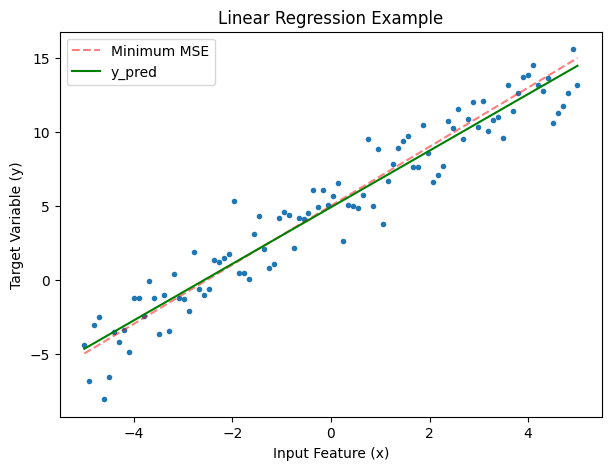

In [6]:
plt.figure(figsize=(7, 5))
plt.scatter(x, y, marker=".")
plt.plot(x, 2 * x + 5, color="red", linestyle="--", alpha=0.5, label="Minimum MSE")  # Goal, minimum MSE.
plt.plot(x, results.params[1] * x + results.params[0], color="green", label="y_pred")
plt.title("Linear Regression Example")
plt.xlabel("Input Feature (x)")
plt.ylabel("Target Variable (y)")
plt.legend()
plt.show()


In [7]:
# Lets modify input data to introduce outliers.
y_out = y.copy()
y_out[::10] = y_out[::10] + 10 * np.random.normal(size=10)

In [8]:
Y_out = y_out  # Dependent variable.
X = x  # Independent variable.
X = sm.add_constant(X)  # Adds a constant term to the predictor.
model_out = sm.OLS(endog=Y_out, exog=X)
results_out = model_out.fit()
print(results_out.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     305.5
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           7.02e-32
Time:                        19:34:23   Log-Likelihood:                -263.28
No. Observations:                 100   AIC:                             530.6
Df Residuals:                      98   BIC:                             535.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1910      0.340     15.266      0.0

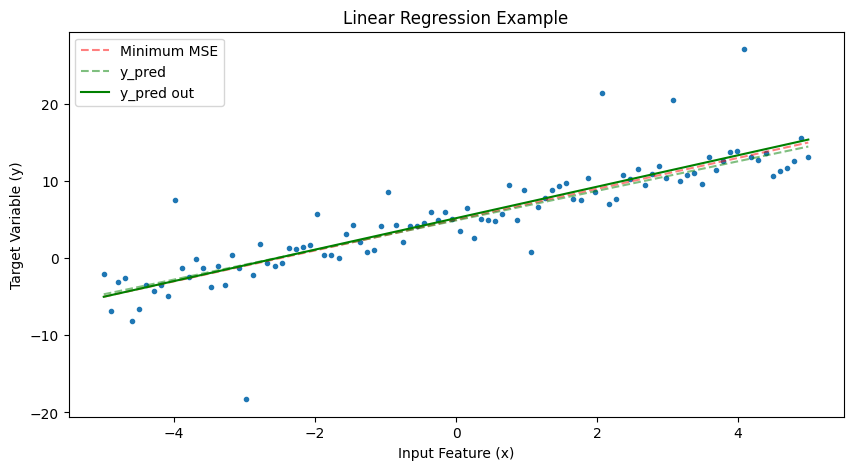

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y_out, marker=".")
plt.plot(x, 2 * x + 5, color="red", linestyle="--", alpha=0.5, label="Minimum MSE")  # Goal, minimum MSE.
plt.plot(
    x, results.params[1] * x + results.params[0], color="green", linestyle="--", alpha=0.5, label="y_pred"
)  # No outliers.
plt.plot(x, results_out.params[1] * x + results_out.params[0], color="green", label="y_pred out")  # With outliers.
plt.title("Linear Regression Example")
plt.xlabel("Input Feature (x)")
plt.ylabel("Target Variable (y)")
plt.legend()
plt.show()


## Regularization

We can use regularization to avoid overfitting:

- **Lasso regression (L1 penalty):** shrinks some coefficients to zero (feature selection).
- **Ridge regression (L2 penalty):** shrinks coefficients imposing a penalty on their size.
- **Elastic Net:** combination of both.

Ref.: https://scikit-learn.org/stable/modules/linear_model.html#linear-models


## Playing with financial assets: Trying to replicate the S&P 500 Index

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
# Load SP500 components prices.
px_comp = pd.read_csv("../../MachineLearning/dataset/data_comp_SP500.csv", index_col="Date", parse_dates=True)
px_comp.head(5)

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,22.010019,2.527393,NaN,NaN,15.535000,7.495556,26.393572,39.919998,21.267511,20.790808,...,71.817345,14.521288,55.838711,12.267728,40.008057,NaN,14.978962,67.402054,34.880001,NaN
2007-01-04,22.080608,2.583492,NaN,NaN,15.830029,7.492222,26.988495,40.820000,21.636642,20.674070,...,71.995499,14.375073,55.861889,12.278193,39.257668,NaN,14.938252,68.905663,34.680000,NaN
2007-01-05,21.875275,2.565094,NaN,NaN,15.830029,7.418889,26.611225,40.619999,21.390556,20.641642,...,71.247040,14.329007,56.192532,12.032106,39.538406,NaN,14.808467,68.861954,34.330002,NaN
2007-01-08,21.798277,2.577761,NaN,NaN,15.887125,7.462222,26.995731,40.450001,21.558935,20.745407,...,70.765923,14.455191,57.253983,12.032106,39.219875,NaN,14.772831,68.416115,34.400002,NaN
2007-01-09,21.823936,2.791895,NaN,NaN,16.026716,7.392222,26.930435,39.630001,21.526560,20.239580,...,70.035217,14.381088,57.480175,12.026868,38.917580,NaN,14.828820,68.459839,34.340000,NaN


In [12]:
# Load SP500 index prices.
px_idx = pd.read_csv("../../MachineLearning/dataset/data_idx_SP500.csv", index_col="Date", parse_dates=True)
px_idx.head(5)


,IDX
Date,
2007-01-03,100.900597
2007-01-04,101.114723
2007-01-05,100.308189
2007-01-08,100.772102
2007-01-09,100.686485


In [13]:
# Align indexes.
px_comp, px_idx = px_comp.align(px_idx, join="inner", axis=0)
# Drop any asset with NaN (just for simplicity).
px_comp = px_comp.dropna(axis=1, how="any")
# Filter to get only 6 moths of data.
px_comp = px_comp["2020-01-01":"2020-06-30"]
px_idx = px_idx["2020-01-01":"2020-06-30"]
# Compute logarithmic returns.
ret_comp = np.log(px_comp).diff().dropna()
ret_idx = np.log(px_idx).diff().dropna()

In [14]:
print(ret_comp.shape)
print(ret_idx.shape)

(124, 409)
(124, 1)


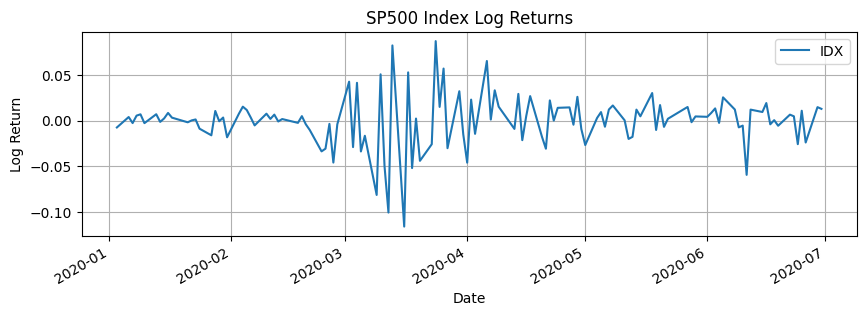

In [15]:
ret_idx.plot(figsize=(10, 3))
plt.title("SP500 Index Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.show()

Now we are going to replicate the index ($y$) using the components as input ($X$). For this task we are using <a href="https://scikit-learn.org/stable/modules/linear_model.html#elastic-net">Elastic-Net</a>.

ElasticNet is a linear regression model trained with both $l1$ and $l2$-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like *Lasso*, while still maintaining the regularization properties of *Ridge*. We control the convex combination of $l1$ and $l2$ using the `l1_ratio` parameter.

Elastic-net is **useful when there are multiple features that are correlated with one another**. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

In [16]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

regr = ElasticNet(
    random_state=42,  # Random seed for reproducibility.
    fit_intercept=False,  # We want to explain the index only using the assets.
    alpha=0.00001,  # Regularization strength.
    l1_ratio=0.2,  # 0.0 for L2 and 1.0 for L1.
)
regr.fit(X=ret_comp, y=ret_idx)

c:\WorkingFolderPersonal\MEFI-01\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.914e-05, tolerance: 9.936e-06
  model = cd_fast.enet_coordinate_descent(


,alpha,1e-05
,l1_ratio,0.2
,fit_intercept,False
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


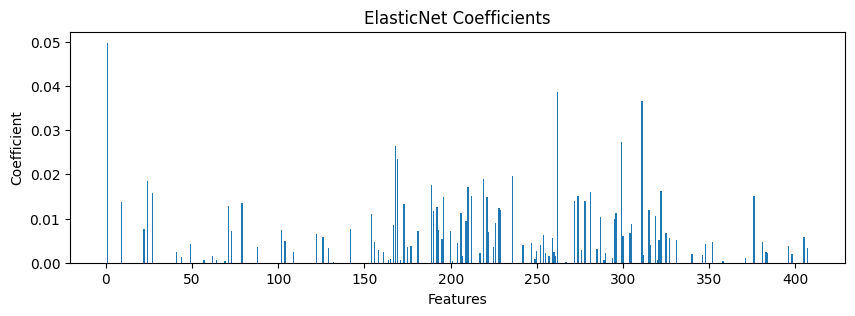

In [17]:
plt.figure(figsize=(10, 3))
plt.bar(range(len(regr.coef_)), regr.coef_)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("ElasticNet Coefficients")
plt.show()


In [18]:
w_p = regr.coef_
w_p = w_p / np.sum(w_p)
retp_p = ret_comp @ w_p

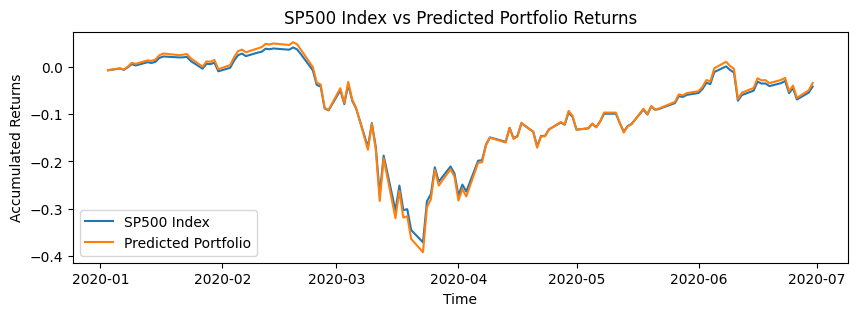

In [19]:
plt.figure(figsize=(10, 3))
plt.plot(ret_idx.cumsum(), label="SP500 Index")
plt.plot(retp_p.cumsum(), label="Predicted Portfolio")
plt.xlabel("Time")
plt.ylabel("Accumulated Returns")
plt.title("SP500 Index vs Predicted Portfolio Returns")
plt.legend()
plt.show()

In [20]:
print("R2:", r2_score(ret_idx, retp_p))  # Percentage of variance explained.
print("MSE:", mean_squared_error(ret_idx, retp_p))  # Mean squared error of returns.

R2: 0.9920335434051453
MSE: 6.382714792811176e-06


**Homework**
- Play with `ElasticNet` parameters.
- Find the best model using `ElasticNetCV` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV)
- Use `linear_model` class (https://scikit-learn.org/stable/api/sklearn.linear_model.html)
- Use and interpret `OLS` from `statsmodels` (https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html)

## Playing with financial assets: Computing the CAPM $\beta$ of an asset.

The **Capital Asset Pricing Model (CAPM)** is a foundational model in modern finance that links an asset’s expected return to its systematic risk relative to the market. It extends Markowitz’s portfolio theory by providing a simple, testable relationship between risk and return.

**Formula** (theoretical CAPM):

$$
\mathbb{E}[R_i] = R_f + \beta_i \big(\mathbb{E}[R_m] - R_f\big)
$$

Where:

* $\mathbb{E}[R_i]$: Expected return of asset $i$.
* $R_f$: Risk-free rate of return.
* $\mathbb{E}[R_m]$: Expected return of the market portfolio.
* $\beta_i = \frac{\text{Cov}(R_i,R_m)}{\text{Var}(R_m)}$: Asset’s systematic risk (its sensitivity to market movements).

In empirical tests, the model is often written as:

$$
\mathbb{E}[R_i] - R_f = \alpha + \beta_i \big(\mathbb{E}[R_m] - R_f\big)
$$

where $\alpha$ (Jensen’s alpha) measures abnormal returns unexplained by CAPM and should be zero if the model holds perfectly. If we are talking about **equity**, a positive $\alpha$ suggests outperformance relative to CAPM predictions (the asset is undervalued), while a negative $\alpha$ suggests underperformance (the asset is overvalued). On the other hand, if we are talking about a **mutual fund**, a positive $\alpha$ suggests the fund manager is getting an extra return compared to its benchmark, while a negative $\alpha$ suggests the fund manager strategy (assets picking or assets allocation) yields worst returns than its benchmark.

$\beta$ interpretation:

- If $\beta = 1$ then the asset moves as the market.
- If $\beta > 1$ then the asset amplifies the market's movements.
- If $\beta < 1$ then the asset attenuates the markets's movements.

In [21]:
import yfinance as yf
import statsmodels.api as sm

px = yf.download(tickers=["AAPL", "^GSPC"], start="2025-01-01", end="2025-06-30", auto_adjust=True)["Close"]
ret = np.log(px).diff().dropna()

rf = 0.0
Y = ret.loc[:, "AAPL"] - rf
X = ret.loc[:, "^GSPC"] - rf
X = sm.add_constant(X)

model = sm.OLS(endog=Y, exog=X)
results = model.fit()
print(results.summary())

[*********************100%***********************]  2 of 2 completed

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     230.9
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.51e-29
Time:                        19:34:27   Log-Likelihood:                 335.18
No. Observations:                 120   AIC:                            -666.4
Df Residuals:                     118   BIC:                            -660.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.001     -1.579      0.1

# Logistic Regression

**Logistic Regression** is a **supervised Machine Learning algorithm** used for **classification tasks**, most commonly binary classification.

- **Supervised:** Requires a labeled dataset (features $X$ and target $y$) to learn the relationship.
- **Classification:** Estimates the probability that a sample belongs to one of two classes ($y \in \{0,1\}$) and assigns it to the most likely one.
- **Parametric:** Assumes a linear functional form with a fixed set of parameters (intercept $\alpha$ and coefficients $\beta_1, \dots, \beta_n$).

First, the model computes a **linear combination** of the input features:

$$
z = \alpha + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

Then, it applies the **sigmoid function** to map this real-valued score $z$ into a probability:

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:

* $z$: linear predictor (raw score)
* $\alpha$: intercept (bias term)
* $\beta_i$: coefficient for feature $x_i$
* $n$: number of features
* $\sigma$: sigmoid function
* $\hat{y} \in (0,1)$: predicted probability of class 1

Instead of minimizing squared error (MSE), Logistic Regression minimizes the **cross-entropy (log-loss):**

$$
XE(y, \hat{y}) = - \Big[ y \log(\hat{y}) + (1-y)\log(1-\hat{y}) \Big]
$$

- If $y=1$, only the first term matters: $-\log(\hat{y})$.
- If $y=0$, only the second term matters: $-\log(1-\hat{y})$.

This loss penalizes confident but wrong predictions very strongly, encouraging the model to output probabilities that align with the true labels.

| $y$ | $\hat{y}$ | $XE(y, \hat{y})$ |
|--|--|--|
| 1 | 1 | 0 |
| 1 | 0 | inf |
| 0 | 1 | inf |
| 0 | 0 | 0 |

## Example

In [22]:
import numpy as np

# Random seed.
rng = np.random.default_rng(42)
# Number of samples.
n_samples = 100
# Input variable.
x = rng.integers(low=-100, high=100, size=n_samples)
# Target.
y = (x >= 0).astype(int)

In [23]:
def linear_trans(x, weights, bias):
    return np.dot(x, weights) + bias


def sigmoid(x, temp=1):
    return 1 / (1 + np.exp(-x / temp))

In [24]:
z = linear_trans(x=x.reshape(-1, 1), weights=np.array([1]), bias=0)
y_hat = sigmoid(z)

w_plot = -0.4316
temp_plot = 10
x_plot = np.linspace(-100, 100, 1000)
y_plot = sigmoid(linear_trans(x_plot.reshape(-1, 1), weights=np.array([w_plot]), bias=0), temp=temp_plot)

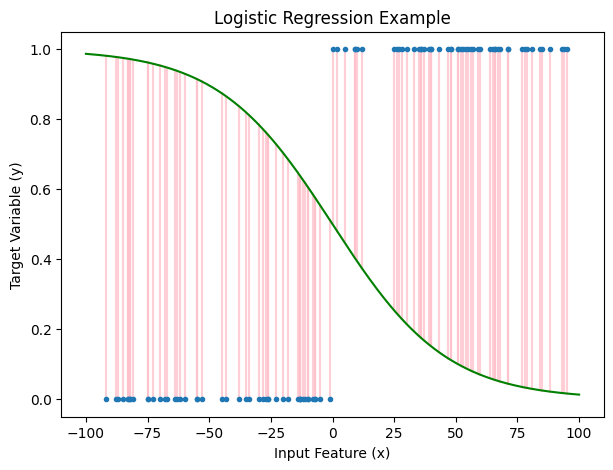

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(x, y, marker=".")
plt.plot(x_plot, y_plot, color="green")

# Plot error between y and y_pred.
for i in range(-100, 100, 1):
    plt.plot(
        [x[i], x[i]],
        [y[i], float(sigmoid(linear_trans(np.array(x[i]), weights=np.array([w_plot]), bias=0), temp=temp_plot)[0])],
        color="pink",
        alpha=0.5,
        zorder=0,
    )

plt.title("Logistic Regression Example")
plt.xlabel("Input Feature (x)")
plt.ylabel("Target Variable (y)")
plt.show()


## Playing with financial assets: Stock Picking

Based on *Wolff, Dominik and Wolff, Dominik and Echterling, Fabian, Stock Picking with Machine Learning (April 22, 2020)*. Available at SSRN: https://ssrn.com/abstract=3607845 or http://dx.doi.org/10.2139/ssrn.3607845

- Weekly data for the historical constituents of the S&P 500 over the period from 2007-01-10 to 2024-10-23.
- For simplicity, we drop all constituents which don't have a complete price series (*survivorship bias*).
- Binary classification task to predict whether a specific stock out- or underperforms the cross sectional median return over the subsequent week.
- Analyze the performace of a strategy that invest in stocks with the highest predicted outperformance probability compared to the S&P 500 and an equally weighted benchmarks.
- Features used:
    - Momentum 12M
    - Momentum 6M
    - Momentum 1M
    - Volatility 12M
    - Volatility 6M
    - Volatility 1M

Load data

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [27]:
# Load SP500 components prices.
px_comp = pd.read_csv("../../MachineLearning/dataset/data_comp_SP500.csv", index_col="Date", parse_dates=True)
# Load SP500 index prices.
px_idx = pd.read_csv("../../MachineLearning/dataset/data_idx_SP500.csv", index_col="Date", parse_dates=True)

Prepare data

In [28]:
# Align indexes.
px_comp, px_idx = px_comp.align(px_idx, join="inner", axis=0)
# Drop any asset with NaN (just for simplicity).
px_comp = px_comp.dropna(axis=1, how="any")
# Align dates.
px_comp, px_idx = px_comp.align(px_idx, join="inner", axis=0)
# Weekly Wednesday resample.
px_comp = px_comp.resample("W-WED").last()
px_idx = px_idx.resample("W-WED").last()

In [29]:
# Print DataFrame information.
px_comp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 930 entries, 2007-01-03 to 2024-10-23
Freq: W-WED
Columns: 409 entries, A to ZBRA
dtypes: float64(409)
memory usage: 2.9 MB


Train/Test datasets

In [30]:
# Split into train and test datasets.
train_length = 156
tests_length = 52
px_comp_datasets = []
px_idx_datasets = []

for i in range(0, int((len(px_comp) - tests_length) / tests_length) - 1):
    # Dataset indexes.
    start_train = i * tests_length
    end_train = i * tests_length + train_length
    start_test = end_train
    end_test = start_test + tests_length
    # Component datasets.
    train = px_comp.iloc[start_train:end_train]
    test = px_comp.iloc[start_test:end_test]
    px_comp_datasets.append((train, test))
    # Index datasets.
    train = px_idx.iloc[start_train:end_train]
    test = px_idx.iloc[start_test:end_test]
    px_idx_datasets.append((train, test))

print(f"Number of training and test datasets of prices (components and index): {len(px_comp_datasets)}")

Number of training and test datasets of prices (components and index): 15


In [31]:
for train_ds, test_ds in px_comp_datasets:
    print(f"Train dataset shape: {train_ds.shape}, Test dataset shape: {test_ds.shape}")

Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (52, 409)
Train dataset shape: (156, 409), Test dataset shape: (46, 409)


In [32]:
for train_ds, test_ds in px_comp_datasets:
    print("Train dataset dates:", train_ds.index.min(), train_ds.index.max())
    print("Test dataset dates:", test_ds.index.min(), test_ds.index.max())
    print("------ + 52 WEEKS ------")

Train dataset dates: 2007-01-03 00:00:00 2009-12-23 00:00:00
Test dataset dates: 2009-12-30 00:00:00 2010-12-22 00:00:00
------ + 52 WEEKS ------
Train dataset dates: 2008-01-02 00:00:00 2010-12-22 00:00:00
Test dataset dates: 2010-12-29 00:00:00 2011-12-21 00:00:00
------ + 52 WEEKS ------
Train dataset dates: 2008-12-31 00:00:00 2011-12-21 00:00:00
Test dataset dates: 2011-12-28 00:00:00 2012-12-19 00:00:00
------ + 52 WEEKS ------
Train dataset dates: 2009-12-30 00:00:00 2012-12-19 00:00:00
Test dataset dates: 2012-12-26 00:00:00 2013-12-18 00:00:00
------ + 52 WEEKS ------
Train dataset dates: 2010-12-29 00:00:00 2013-12-18 00:00:00
Test dataset dates: 2013-12-25 00:00:00 2014-12-17 00:00:00
------ + 52 WEEKS ------
Train dataset dates: 2011-12-28 00:00:00 2014-12-17 00:00:00
Test dataset dates: 2014-12-24 00:00:00 2015-12-16 00:00:00
------ + 52 WEEKS ------
Train dataset dates: 2012-12-26 00:00:00 2015-12-16 00:00:00
Test dataset dates: 2015-12-23 00:00:00 2016-12-14 00:00:00
---

Features and labels

In [33]:
# Compute features and labels.
WEEKS_IN_A_YEAR = 52
WEEKS_IN_A_SEMESTER = 26
WEEKS_IN_A_MONTH = 4


def momentum(data: pd.DataFrame) -> pd.Series:
    """Compute cumulative log return (momentum) for each asset over the provided window.

    Takes the natural log of prices and returns log_px[last] - log_px[first],
    i.e. log(price_last / price_first), the total log return across the period.

    Args:
        data (pd.DataFrame): Price history (index = ascending dates, columns = assets).
            Must contain at least two rows and strictly positive prices.

    Returns:
        pd.Series: Momentum (cumulative log return) per asset.

    Raises:
        ValueError: If fewer than two rows or any non-positive price is found.
    """
    if data.shape[0] < 2:
        raise ValueError("Need at least two observations to compute momentum.")
    if (data <= 0).any().any():
        raise ValueError("Prices must be strictly positive for log transformation.")
    log_px = np.log(data)
    return log_px.iloc[-1] - log_px.iloc[0]


def volatility(data: pd.DataFrame) -> pd.Series:
    """Compute realized volatility (sample std) of log returns over the given price window.

    Process:
        1. Compute log returns: ln(P_t) - ln(P_{t-1}).
        2. Return sample standard deviation (ddof=1) per asset.

    Args:
        data (pd.DataFrame): Price history (ascending DatetimeIndex, columns = assets) with strictly positive prices.

    Returns:
        pd.Series: Realized volatility (sample standard deviation of log returns) for each asset.

    Raises:
        ValueError: If fewer than two rows or any non-positive price is present.
    """
    if data.shape[0] < 2:
        raise ValueError("Need at least two observations to compute volatility.")
    if (data <= 0).any().any():
        raise ValueError("Prices must be strictly positive for log transformation.")
    log_rets = np.log(data).diff().dropna()
    return log_rets.std(ddof=1)


def compute_features(data: pd.DataFrame) -> pd.DataFrame:
    # Features.
    features = pd.DataFrame(
        {
            "date": data.index[-1],
            "momentum_12m": momentum(data.iloc[-WEEKS_IN_A_YEAR:]),
            "volatility_12m": volatility(data.iloc[-WEEKS_IN_A_YEAR:]),
            "momentum_6m": momentum(data.iloc[-WEEKS_IN_A_SEMESTER:]),
            "volatility_6m": volatility(data.iloc[-WEEKS_IN_A_SEMESTER:]),
            "momentum_1m": momentum(data.iloc[-WEEKS_IN_A_MONTH:]),
            "volatility_1m": volatility(data.iloc[-WEEKS_IN_A_MONTH:]),
        }
    )
    features.reset_index(
        drop=False, names=["ticker"], inplace=True
    )  # If you want to preserve the corresponding ticker.
    # features.reset_index(drop=True, inplace=True)

    return features


def compute_features_and_labels(data: pd.DataFrame) -> pd.DataFrame:
    features_dfs = []
    target_dfs = []
    # We loop until "data.shape[0] - 1" because we need to compute the return of the next week.
    for i in range(WEEKS_IN_A_YEAR, data.shape[0], 1):
        # Features.
        features = compute_features(data.iloc[i - WEEKS_IN_A_YEAR : i])
        features_dfs.append(features)

        # Labels.
        ret_next_week = np.log(data.iloc[i]) - np.log(data.iloc[i - 1])  # Next - Prev
        cross_sectional_median_return = ret_next_week.median()
        target = (ret_next_week > cross_sectional_median_return).astype(int)
        target_dfs.append(target)

    # Concatenate all dataframes.
    features_df = pd.concat(features_dfs, ignore_index=True)
    target_df = pd.concat(target_dfs, ignore_index=True)

    # Merge X and y in a single DataFrame.
    train_df = features_df.copy()
    train_df["target"] = target_df

    return train_df


train_dfs = []
for train_ds, _ in px_comp_datasets:
    train_df = compute_features_and_labels(train_ds)
    train_dfs.append(train_df)

print(f"Number of training datasets of features: {len(train_dfs)}")


Number of training datasets of features: 15


In [34]:
# 42536 samples / 409 assets = 104 weeks => 104 weeks + 52 weeks = 156 weeks
for train_ds in train_dfs:
    print(f"Train dataset shape: {train_ds.shape}")

Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)
Train dataset shape: (42536, 9)


In [35]:
# Train dataset dates: 2007-01-03 00:00:00 2009-12-23 00:00:00
print(f"Samples from {train_dfs[0]['date'].min()} to {train_dfs[0]['date'].max()}")

# 2007-12-26 = 2007-01-03 + 52 WEEKS => Weeks needed to compute features (momentum and volatility 12m).
# 2009-12-16 = 2009-12-23 - 1 WEEK => Last week needed to compute target.

Samples from 2007-12-26 00:00:00 to 2009-12-16 00:00:00


Train model and implement cross-validation manually

In [36]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

skf = KFold(n_splits=5, shuffle=True, random_state=42)

X_train = train_dfs[0].iloc[:, 2:-1]  # All features except ticker, date and target.
y_train = train_dfs[0].iloc[:, -1]  # target

std = StandardScaler()
X_train_std = std.fit_transform(X_train)

for i, (train_index, val_index) in enumerate(skf.split(X_train_std, y_train)):
    model = LogisticRegression(
        penalty="elasticnet",  # Elastic Net regularization.
        solver="saga",
        fit_intercept=False,  # We want to explain the target only using the features.
        random_state=42,
        max_iter=100,
        verbose=0,
        l1_ratio=0.1,
    )
    model.fit(X_train_std[train_index], y_train[train_index])
    print(
        f"Fold {i + 1}: Train Accuracy: {model.score(X_train_std[train_index], y_train[train_index])}, Val Accuracy: {model.score(X_train_std[val_index], y_train[val_index])}"
    )

# TODO: store metrics, compute mean, try different hyperparameters, etc.

Fold 1: Train Accuracy: 0.5139884800752321, Val Accuracy: 0.5161024917724495
Fold 2: Train Accuracy: 0.5131211613623674, Val Accuracy: 0.5098154461032092
Fold 3: Train Accuracy: 0.5157365776249669, Val Accuracy: 0.5045256847302222
Fold 4: Train Accuracy: 0.5147962032384142, Val Accuracy: 0.5189843658163865
Fold 5: Train Accuracy: 0.5165300185136207, Val Accuracy: 0.5135770541906665


Or do it with the help of the `LogisticRegressionCV` class

In [37]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

X_train = train_dfs[0].iloc[:, 2:-1]  # All features except ticker, date and target.
y_train = train_dfs[0].iloc[:, -1]  # target

std = StandardScaler()
X_train_std = std.fit_transform(X_train)

model = LogisticRegressionCV(
    Cs=10,  # 10 elements in the list of the inverse of regularization strength.
    fit_intercept=False,  # We want to explain the target only using the features.
    cv=None,  # Default cross-validation generator used is Stratified K-Folds. 5 folds by default.
    refit=True,  # Refit with best hyper-parameters.
    penalty="elasticnet",  # Elastic Net regularization.
    scoring=None,  # None: accuracy is used.
    solver="saga",
    random_state=42,
    max_iter=100,
    verbose=0,
    # l1_ratios=list(np.linspace(0.0, 1.0, 10)),  # 0 = "l2"; 1 = "l1"
    # l1_ratios=list(np.linspace(0.0, 0.5, 10)),  # 0 = "l2"; 1 = "l1"
    # l1_ratios=list(np.linspace(0.0, 0.3, 10)),  # 0 = "l2"; 1 = "l1"
    l1_ratios=list(np.linspace(0.0, 0.05, 10)),  # 0 = "l2"; 1 = "l1"
)
model.fit(X_train_std, y_train)
print(f"Accuracy: {model.score(X_train_std, y_train)}")
print(f"Best parameters: C={model.C_}, l1_ratio={model.l1_ratio_}")

Accuracy: 0.5125305623471883
Best parameters: C=[0.0001], l1_ratio=[0.03333333]


Build portfolio for the next test window based on the predictions of the model using the last sample of the training dataset

In [38]:
px_comp_datasets[0][0]


,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WRB,WST,WTW,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,22.010019,2.527393,15.535000,7.495556,26.393572,39.919998,21.267511,20.790808,24.799397,40.560001,...,7.434404,21.841764,71.817345,14.521288,55.838711,12.267728,40.008057,14.978962,67.402054,34.880001
2007-01-10,21.625010,2.925504,16.079370,7.423333,27.090048,39.220001,21.902174,20.064480,24.758421,42.720001,...,7.126785,19.993456,69.233307,14.294958,59.423237,12.089704,38.323734,15.007421,68.232529,34.369999
2007-01-17,21.092407,2.863676,16.449530,7.345556,27.220642,40.200001,21.520081,20.220121,25.096523,44.490002,...,7.085913,20.562496,71.888618,14.447180,61.343121,12.063524,39.117310,15.270214,69.334068,35.520000
2007-01-24,20.925568,2.614858,17.087725,7.253333,26.640244,39.689999,21.371126,20.810263,24.461292,42.830002,...,7.270913,20.378494,73.635002,15.016018,64.063400,12.210131,40.434540,15.165616,69.159218,35.000000
2007-01-31,20.534134,2.585603,16.912214,7.176667,27.387505,38.869999,21.209225,20.751898,24.445934,43.720001,...,7.118180,20.820387,72.815269,15.143451,64.811630,12.215363,40.002659,15.311040,73.626457,34.669998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-11-25,18.955572,6.158335,18.746485,7.772222,30.810499,36.169998,20.922855,21.392488,26.946680,24.030001,...,5.408850,17.508759,54.025188,8.573459,42.206081,12.191229,43.786190,19.304935,51.674896,27.490000
2009-12-02,18.923489,5.918262,18.756826,7.771111,31.911425,36.500000,21.449757,21.528742,26.824179,23.910000,...,5.430864,17.388281,53.264828,9.147374,42.774246,12.238804,43.396835,19.094095,51.552509,27.330000
2009-12-09,18.769484,5.965615,18.470858,7.743333,32.070869,35.849998,21.520334,20.765703,26.593410,23.740000,...,5.419856,17.281200,52.270512,9.242293,40.662983,12.452892,41.679054,18.683241,50.625835,27.330000


In [39]:
# First train dataset.
data_for_prediction = px_comp_datasets[0][0]
# Last day on train dataset.
max_date_train = data_for_prediction.index.max()
print(f"Last date in train dataset: {max_date_train}")
# Features for the last day in train dataset.
features = compute_features(data_for_prediction)
# Standardize features of the last sample of train dataset.
features_std = std.transform(features.iloc[:, 2:])  # All features except ticker and date.
# Predict probabilities of out- or underperform for the next week (class 1 or 0).
proba_next_test = model.predict_proba(features_std)
# Create a DataFrame with the results, add tickers and sort descending.
df = pd.DataFrame(proba_next_test, columns=["P(y=0)", "P(y=1)"])
df["ticker"] = features["ticker"].values
df.set_index("ticker", inplace=True)
df.sort_values(by="P(y=1)", ascending=False, inplace=True)
# Select top 'n' assets.
n = 10
df_top_n = df.head(n)
# Create a portfolio using probabilities as weights.
portfolio_weights = df_top_n.loc[:, ["P(y=1)"]] / df_top_n.loc[:, ["P(y=1)"]].sum()
portfolio_weights.columns = ["weight"]
portfolio_weights

Last date in train dataset: 2009-12-23 00:00:00


,weight
ticker,
C,0.100735
MGM,0.100068
STE,0.100023
HBAN,0.099955
RF,0.099900
KEY,0.099897
NEM,0.099888
KR,0.099879
XOM,0.099870


In [40]:
# Auxiliary code for saving data to disk.
df = pd.DataFrame(data=X_train_std, columns=features.columns[2:])
df["target"] = y_train.values
df.to_csv("../dataset/01_LR_training_data_standardized.csv", index=False)

df = pd.DataFrame(data=features_std, columns=features.columns[2:], index=features["ticker"])
df.to_csv("../dataset/01_LR_prediction_data_standardized.csv", index=True)

px_comp_datasets[0][1].to_csv("../dataset/01_LR_test_data_component_prices.csv", index=True)
px_idx_datasets[0][1].to_csv("../dataset/01_LR_test_data_index_prices.csv", index=True)

Compare performance of our portfolio with S&P500 and equally weighted benchmarks

In [41]:
# Equally weighted portfolio.
ew_portfolio_weights = np.array([1 / len(portfolio_weights)] * len(portfolio_weights))
ew_portfolio_weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [42]:
# Prices for components and index.
px_comp = px_comp_datasets[0][1]  # Test dataset of components prices.
px_idx = px_idx_datasets[0][1]  # Test dataset of index prices.
# Log returns for components and index.
ret_comp = np.log(px_comp).diff().fillna(0)
ret_idx = np.log(px_idx).diff().fillna(0)
# Log returns for the equually weighted portfolio.
ret_ew_p = ret_comp.loc[:, portfolio_weights.index] @ ew_portfolio_weights  # R @ w
ret_ew_p.name = "EW Portfolio"
# Log returns for the portfolio.
print(f"Shape of portfolio weights: {portfolio_weights['weight'].shape}")
print(f"Shape of component returns: {ret_comp.loc[:, portfolio_weights.index].shape}")
ret_p = ret_comp.loc[:, portfolio_weights.index] @ portfolio_weights["weight"]  # R @ w
ret_p.name = "Portfolio"
ret_p

Shape of portfolio weights: (10,)
Shape of component returns: (52, 10)


Date
2009-12-30    0.000000
2010-01-06    0.047953
2010-01-13    0.046423
2010-01-20    0.004170
2010-01-27   -0.010470
2010-02-03    0.017157
2010-02-10   -0.029295
2010-02-17    0.029818
2010-02-24    0.005852
2010-03-03    0.013641
2010-03-10    0.050625
2010-03-17    0.034649
2010-03-24   -0.006680
2010-03-31   -0.005441
2010-04-07    0.061290
2010-04-14    0.042823
2010-04-21    0.010034
2010-04-28   -0.014952
2010-05-05   -0.023243
2010-05-12    0.010931
2010-05-19   -0.077864
2010-05-26   -0.043530
2010-06-02    0.031318
2010-06-09   -0.051343
2010-06-16    0.053490
2010-06-23   -0.015591
2010-06-30   -0.055045
2010-07-07    0.021092
2010-07-14    0.040735
2010-07-21   -0.062600
2010-07-28    0.062821
2010-08-04    0.018319
2010-08-11   -0.050177
2010-08-18   -0.001779
2010-08-25   -0.055124
2010-09-01    0.028975
2010-09-08    0.029122
2010-09-15    0.027724
2010-09-22   -0.004432
2010-09-29    0.005431
2010-10-06    0.029803
2010-10-13    0.010364
2010-10-20   -0.027177
2010-1

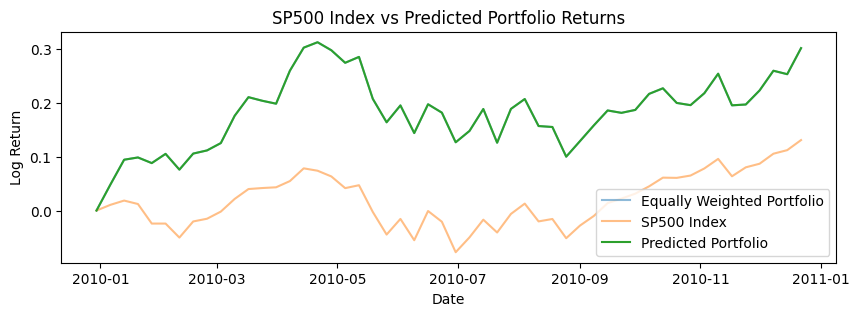

Final accumulated return of SP500 Index: 0.13084380194114686
Final accumulated return of Equally Weighted Portfolio: 0.3014905922964957
Final accumulated return of Predicted Portfolio: 0.30160331806731094


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(ret_ew_p.cumsum(), label="Equally Weighted Portfolio", alpha=0.5)
plt.plot(ret_idx.cumsum(), label="SP500 Index", alpha=0.5)
plt.plot(ret_p.cumsum(), label="Predicted Portfolio")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.title("SP500 Index vs Predicted Portfolio Returns")
plt.legend()
plt.show()

print(f"Final accumulated return of SP500 Index: {ret_idx.cumsum().iloc[-1, 0]}")
print(f"Final accumulated return of Equally Weighted Portfolio: {ret_ew_p.cumsum().iloc[-1]}")
print(f"Final accumulated return of Predicted Portfolio: {ret_p.cumsum().iloc[-1]}")


**Homework**

- Complete the backtest of the strategy by iterating through the remaining train/test datasets.
- Try to improve the model's accuracy by incorporating additional features (take the paper as a reference).
- Experiment with different portfolio sizes (e.g., 5, 20, 30 assets) and compare the performance results.
- Train the model using TimeSeries K-Fold Cross-Validation both *with* and *without* purging.
- Enable short positions in the strategy.
- As the predicted probabilities —and therefore the final weights— are very close, the portfolio ends up nearly equally weighted. What transformation could you apply to make the weights more distinct?

## Playing with financial assets: Bankrupcy risk prediction model

Ref.:
- Book: <a href="https://www.packtpub.com/en-us/product/hands-on-artificial-intelligence-for-banking-9781788833967?srsltid=AfmBOopqDgDu6joWOmyfcW-y7zHtC72wvy9-o1Wgg05dWgBW_UgaePCx">Hands-On Artificial Intelligence for Banking: A practical guide to building intelligent financial applications using machine learning techniques</a> - Chapter 3.
- Dataset: <a href="https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data">Polish Companies Bankruptcy dataset</a>

The bank, as the lender, needs to dictate the interest rates that will cover the cost of lending. The bank provides the interest rate by considering its cost of borrowing from others, plus the risk that the company might file for bankruptcy after taking the loan from the bank.

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    average_precision_score,
)

Read data

In [166]:
data = pd.read_csv("../dataset/5year.csv")
for i in range(1, 65, 1):
    data.loc[:, f"Attr{i}"] = pd.to_numeric(data.loc[:, f"Attr{i}"], errors="coerce", downcast="float")
data.loc[:, "class"] = pd.to_numeric(data.loc[:, "class"], errors="raise", downcast="integer")
data = data.infer_objects(copy=False)  # Convert object columns to best possible types
data = data.fillna(value=0.0)  # Fill NaNs after type conversion
data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.011340,1.02050,-66.519997,0.342040,0.109490,0.57752,1.08810,0.320360,...,0.080955,0.275430,0.91905,0.002024,7.271100,4.734300,142.759995,2.5568,3.25970,0
1,-0.006202,0.48465,0.232980,1.59980,6.182500,0.000000,-0.006202,1.06340,1.27570,0.515350,...,-0.028591,-0.012035,1.00470,0.152220,6.091100,3.274900,111.139999,3.2841,3.37000,0
2,0.130240,0.22142,0.577510,3.60820,120.040001,0.187640,0.162120,3.05900,1.14150,0.677310,...,0.123960,0.192290,0.87604,0.000000,8.793400,2.987000,71.530998,5.1027,5.61880,0
3,-0.089951,0.88700,0.269270,1.52220,-55.992001,-0.073957,-0.089951,0.12740,1.27540,0.113000,...,0.418840,-0.796020,0.59074,2.878700,7.652400,3.330200,147.559998,2.4735,5.92990,0
4,0.048179,0.55041,0.107650,1.24370,-22.959000,0.000000,0.059280,0.81682,1.51500,0.449590,...,0.240400,0.107160,0.77048,0.139380,10.118000,4.095000,106.430000,3.4294,3.36220,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.907000,0.000000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.472000,12.432000,49.117001,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.364998,-0.578050,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.720001,44.758999,81.220001,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.440002,-0.179050,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.852600,3.489200,207.869995,1.7559,9.95270,1
5908,-0.108860,0.74394,0.015449,1.08780,-17.003000,-0.108860,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.886000,6.076900,83.122002,4.3911,0.95575,1


Read attribute names

In [167]:
# Open file.
attrib_file_name = open("../dataset/attrib.txt", "r")
attrib_contents = attrib_file_name.read()

# Read column names.
y_name = "target"
regexp = re.compile(r"X[0-9]+\s")
feature_names = regexp.split(attrib_contents)
feature_names = feature_names[1:]
feature_names.append(y_name)
data.columns = feature_names

In [168]:
data.describe()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets\n,target
count,5910.000000,5910.000000,5910.000000,5910.000000,5.910000e+03,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,...,5910.000000,5910.000000,5910.000000,5910.000000,5.910000e+03,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000
mean,-0.022335,0.464849,0.189059,4.875091,1.937064e+01,0.022572,-0.111894,5.720265,1.588054,0.545303,...,0.057222,-0.263704,0.956504,0.279177,8.697212e+02,10.913727,241.978184,9.095307,64.094887,0.069374
std,6.162090,5.749832,1.177437,91.272416,2.150927e+04,9.989544,9.054836,102.199574,1.548397,5.762292,...,0.698096,18.420415,0.857326,5.839075,6.268324e+04,41.117993,6221.135690,102.892414,2131.102763,0.254110
min,-463.890015,-430.869995,-72.067001,-0.403110,-1.076400e+06,-463.890015,-517.479980,-3.735100,-3.496000,-71.444000,...,-46.787998,-1236.300049,-0.164390,-184.979996,-1.244000e+01,-0.092493,-236.529999,-1.543200,-3.726500,0.000000
25%,0.003895,0.255100,0.043530,1.090175,-4.369900e+01,0.000000,0.005836,0.477145,1.014725,0.318690,...,0.010996,0.015563,0.876553,0.000000,4.822400e+00,4.261125,44.646751,3.043600,2.048475,0.000000
50%,0.046658,0.451610,0.219360,1.646700,3.918550e-01,0.000000,0.056433,1.144050,1.139650,0.522925,...,0.053218,0.109645,0.950370,0.005671,8.576400e+00,6.188550,73.778500,4.918850,3.992700,0.000000
75%,0.117040,0.661530,0.418318,2.922650,4.865500e+01,0.108490,0.136825,2.761725,1.825875,0.720620,...,0.125085,0.242785,0.990405,0.204990,1.657500e+01,9.342925,118.720001,8.104950,9.053725,0.000000
max,87.459000,72.416000,28.336000,6845.799805,1.250100e+06,543.250000,5.530000,6868.500000,65.607002,339.850006,...,1.651000,87.981003,47.787998,308.149994,4.818700e+06,1308.500000,451380.000000,7641.299805,158180.000000,1.000000


Split in train and test datasets

In [220]:
X = data.iloc[:, :-1]  # All columns except target.
y = data.iloc[:, -1]  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4728, 64) (4728,)
(1182, 64) (1182,)


Train base model

In [261]:
std = StandardScaler()
X_train_std = pd.DataFrame(std.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(std.transform(X_test), columns=X_test.columns)

model = LogisticRegression(penalty="l2", C=1e5, fit_intercept=True, max_iter=1500)
model.fit(X_train_std, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100000.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1500
,multi_class,'deprecated'


Confusion Matrix (default threshold)

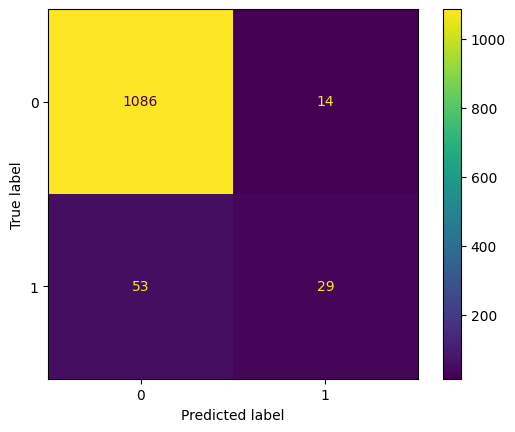

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1100
           1       0.67      0.35      0.46        82

    accuracy                           0.94      1182
   macro avg       0.81      0.67      0.72      1182
weighted avg       0.93      0.94      0.93      1182



In [ ]:
y_pred = model.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))


ROC (Receiver Operating Characteristic)

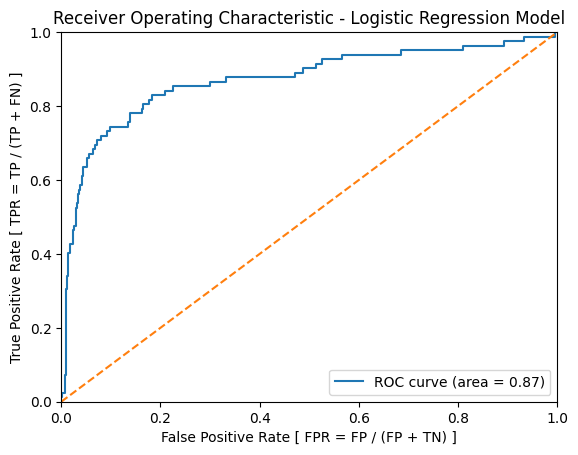

In [264]:
# Compute z, the value before applying the sigmoid function.
z = model.decision_function(X_test_std)

# Compute FPR and TPR based on different thresholds.
# Thresholds are between [min(z), +inf] interval.
# When sigmoid is shifted to +inf, the prediction is always 0.
# When sigmoid is shifted to min(z), the prediction is always 1.
fpr, tpr, thresholds = roc_curve(y_test, z, pos_label=1)

# Compute AUC (Area Under the Curve).
roc_auc = auc(fpr, tpr)

# Plot ROC curve.
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate [ FPR = FP / (FP + TN) ]")
plt.ylabel("True Positive Rate [ TPR = TP / (TP + FN) ]")
plt.title("Receiver Operating Characteristic - Logistic Regression Model")
plt.legend(loc="lower right")
plt.show()

PR (Precision-Recall)

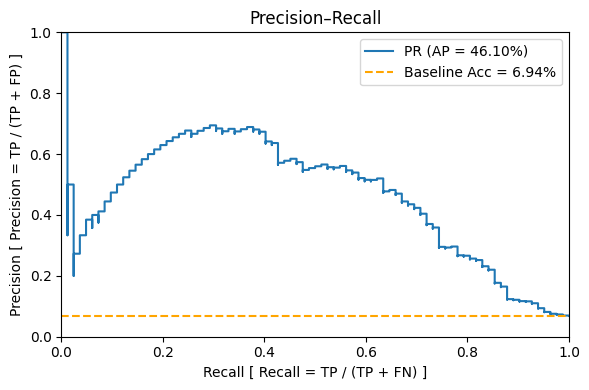

In [265]:
# Compute PR (Precision-Recal curve)
prec, rec, thr = precision_recall_curve(y_test, z)
# PR-AUC (Precision-Recall Area Under the Curve)
ap = average_precision_score(y_test, z)

plt.figure(figsize=(6, 4))
plt.step(rec, prec, where="post", label=f"PR (AP = {ap:.2%})")
# Base line (Accuracy) = always say 1.
base = y_test.mean()
plt.hlines(base, 0, 1, linestyles="--", label=f"Baseline Acc = {base:.2%}", color="orange")

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Recall [ Recall = TP / (TP + FN) ]")
plt.ylabel("Precision [ Precision = TP / (TP + FP) ]")
plt.title("Precision–Recall")
plt.legend()
plt.tight_layout()
plt.show()


`z` vs `target`

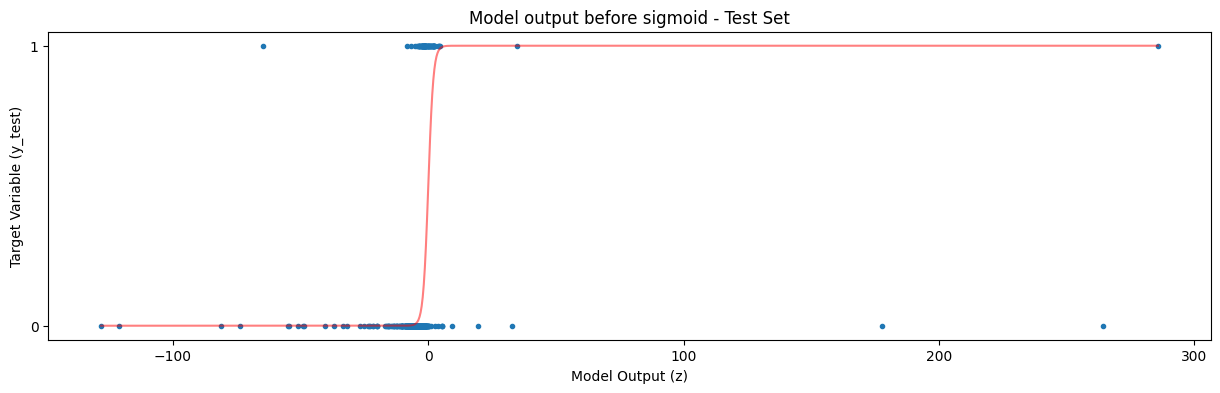

In [275]:
# Plot z on x-axis and y_test on y-axis.
plt.figure(figsize=(15, 4))
plt.scatter(z, y_test, marker=".")
plt.title("Model output before sigmoid - Test Set")
plt.xlabel("Model Output (z)")
plt.ylabel("Target Variable (y_test)")
plt.yticks([0, 1])
# Plot sigmoid curve.
z_plot = np.linspace(z.min(), z.max(), 1000)
y_plot = 1 / (1 + np.exp(-z_plot))
plt.plot(z_plot, y_plot, color="red", label="Sigmoid Curve", alpha=0.5)
plt.show()

Importance by permutation

In [256]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(
    estimator=model,
    X=X_test_std,
    y=y_test,
    scoring="f1_weighted",  # Evaluation metric.
    n_repeats=10,  # Number of permutations applied to each feature (K).
    random_state=42,  # Random state for reproducibility.
    n_jobs=-1,  # Number of jobs to run in paralell (-1 means using all available cores).
)


In [257]:
# importances_mean: ndarray of shape (n_features, ) Mean of feature importance over n_repeats.
# importances_std: ndarray of shape (n_features, ) Standard deviation over n_repeats.
# importances: ndarray of shape (n_features, n_repeats) Raw permutation importance scores.
importante_df = pd.DataFrame({"feature": X_test_std.columns, "mean": pi.importances_mean, "std": pi.importances_std})
importante_df.sort_values("mean", ascending=False, inplace=True)
importante_df


,feature,mean,std
32,operating expenses / short-term liabilities,0.077353,0.003894
62,sales / short-term liabilities,0.061199,0.003455
49,current assets / total liabilities,0.041453,0.003536
45,(current assets - inventory) / short-term liab...,0.031302,0.002990
20,sales (n) / sales (n-1),0.030116,0.003522
...,...,...,...
29,(total liabilities - cash) / sales,-0.001316,0.000913
41,profit on operating activities / sales,-0.001423,0.000564
17,gross profit / total assets,-0.002052,0.000951
6,EBIT / total assets,-0.002122,0.001060


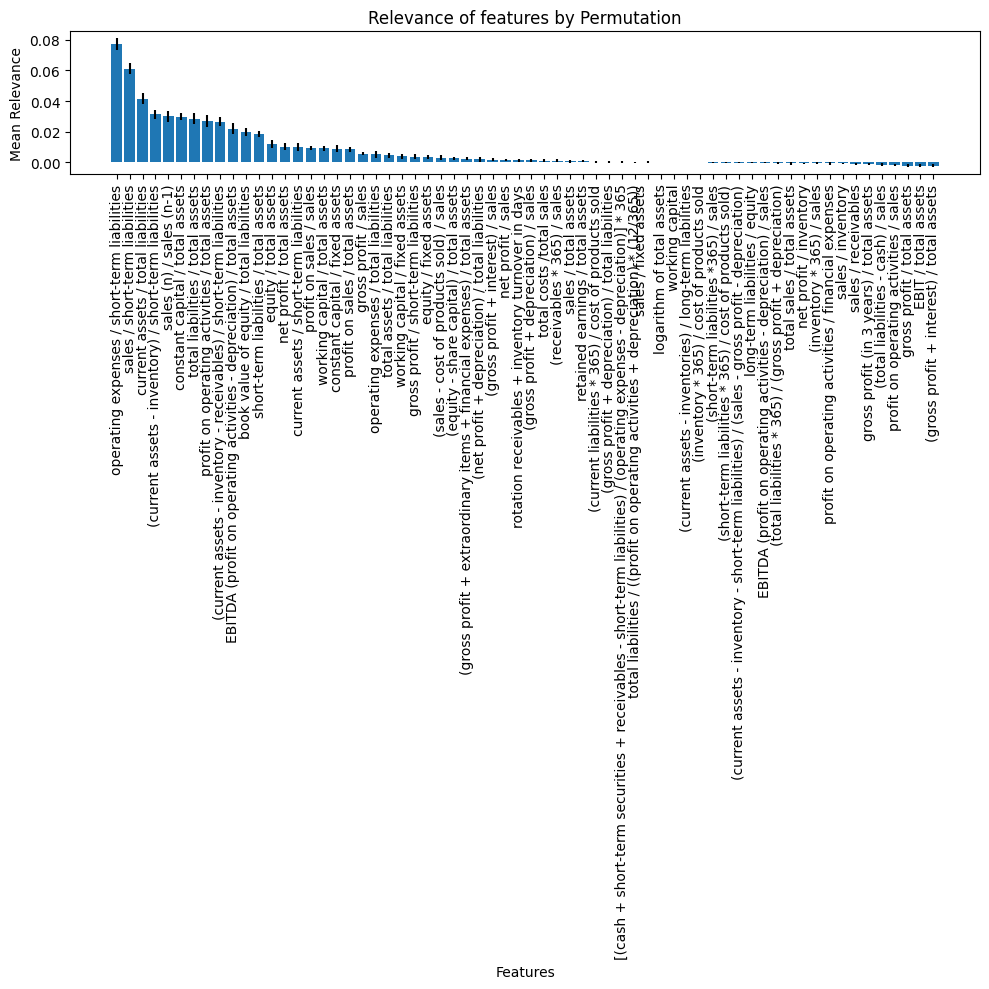

In [258]:
plt.figure(figsize=(10, 10))
plt.title("Relevance of features by Permutation")
plt.bar(
    range(importante_df.shape[0]), importante_df["mean"], yerr=importante_df["std"], tick_label=importante_df["feature"]
)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Relevance")
plt.tight_layout()
plt.show()


In [259]:
from tqdm import tqdm

import warnings

warnings.filterwarnings("ignore")  # To avoid convergence warnings.

features_importantes = list(importante_df["feature"])

metrics_total_forward = []
for idx in tqdm(range(len(features_importantes))):
    # Entrenamos el modelo.
    model = LogisticRegression(penalty="l2", C=1e5, fit_intercept=True, max_iter=1500)
    model.fit(X_train_std.loc[:, features_importantes[: idx + 1]], y_train)

    # Predecimos el conjunto de Validación.
    y_pred = model.predict(X_test_std.loc[:, features_importantes[: idx + 1]])

    # Calculamos el reporte de clasificación.
    metrics = classification_report(y_test, y_pred, output_dict=True)
    metrics_total_forward.append(metrics["1"]["recall"])


100%|██████████| 64/64 [00:20<00:00,  3.11it/s]


Best f1_weighted: 0.4024390243902439 at index 57


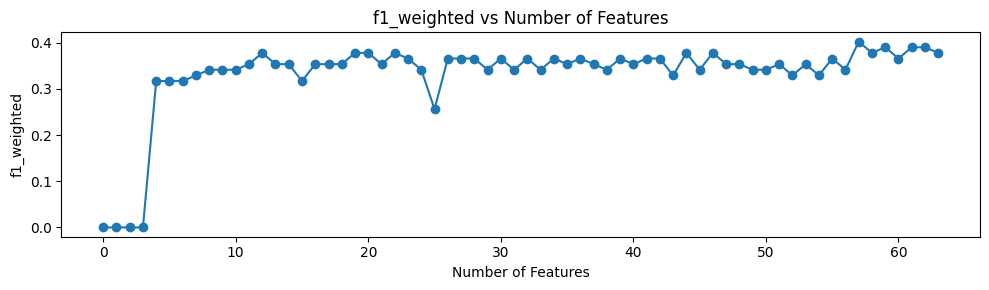

In [260]:
metric = "f1_weighted"
idx_max = metrics_total_forward.index(max(metrics_total_forward))
print(f"Best {metric}: {max(metrics_total_forward)} at index {idx_max}")

plt.figure(figsize=(10, 3))
plt.plot(range(len(features_importantes)), metrics_total_forward, marker="o")
plt.title(f"{metric} vs Number of Features")
plt.xlabel("Number of Features")
plt.ylabel(f"{metric}")
plt.tight_layout()
plt.show()
